# AIT-580 Final Project
by Indu Priya Sharma 

Dataset choosen for project is Real Estates GL.
The dataset contains the pricing of houses in Connecticut from 2001 to 2020. There are different columns that are available for our findings such as the List Year, Address, Towns in which the houses, buildings, apartmemts are located, Sales Amount, Assessed Value, and Property type.


# Data Import (Extraction)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats, special

from plotnine import *
%matplotlib inline

from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [162]:
df = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')

/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1766759599.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.


In [163]:
df.dtypes

Serial Number         int64
List Year             int64
Date Recorded        object
Town                 object
Address              object
Assessed Value      float64
Sale Amount         float64
Sales Ratio         float64
Property Type        object
Residential Type     object
Non Use Code         object
Assessor Remarks     object
OPM remarks          object
Location             object
dtype: object

In [164]:
#changing the data type
df.tail()

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN
997212,190344,2019,12/20/2019,Milford,250 RESEARCH DR,4035970.0,7450000.0,0.541700,NaN,NaN,NaN,NaN,NaN,NaN


##### In the above process of data extraction we checked the data after importing it using the csv file downloaded from data.gov. As per the file there are 997213 rows and 14columns have been recorded. The data set consists of NOIR data types as per the specifications provided by the professor.

In [165]:
df['Location'].unique()

array([nan, 'POINT (-73.18197 41.64672)', 'POINT (-72.22025 41.3942)',
       ..., 'POINT (-72.80758 41.68147)', 'POINT (-72.96622 41.32883)',
       'POINT (-72.07006 41.53315)'], dtype=object)

In [166]:
df['OPM remarks'].unique()

array([nan, 'GAS STATION', 'GOOD SALE PER MLS', ..., 'INCLUDES #19158',
       'TOTAL RENOVATION PER MLS - SEE PREVIOUS SALE #1900075',
       'PER MLS CLOSING PRICE = $1,145,000'], dtype=object)

In [167]:
df['Property Type'].unique()

array(['Commercial', 'Residential', 'Vacant Land', nan, 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [168]:
df['Assessor Remarks'].unique()

array([nan, 'WATERFRONT/COTTAGE ONLY/LAND IS ASSOCIATION OWNED',
       'FORECLOSURE SALE OUT OF BANK', ..., 'FAMILY & FARM LAND',
       'FORECLOSURE BY SALE:  1-7-9-0', 'MOTIVATED SELLER -DIVORCE'],
      dtype=object)

In [169]:
df['Town'].unique()

array(['Ansonia', 'Ashford', 'Avon', 'Berlin', 'Bethany', 'Bethel',
       'Bethlehem', 'Bloomfield', 'Branford', 'Bristol', 'Brookfield',
       'Canaan', 'Canton', 'Cheshire', 'Chester', 'Colchester',
       'Columbia', 'Cornwall', 'Coventry', 'Cromwell', 'Danbury', 'Derby',
       'Eastford', 'East Haddam', 'East Haven', 'Farmington', 'Chaplin',
       'Clinton', 'East Lyme', 'Easton', 'Enfield', 'Essex', 'Durham',
       'Franklin', 'Glastonbury', 'Hamden', 'Granby', 'Greenwich',
       'Colebrook', 'East Windsor', 'Griswold', 'Bolton', 'Groton',
       'Guilford', 'Hartford', 'Harwinton', 'Milford', 'Killingly',
       'Killingworth', 'Lebanon', 'Lisbon', 'Litchfield', 'Lyme',
       'Manchester', 'Putnam', 'Norwalk', 'Stafford', 'Mansfield',
       'Sherman', 'Meriden', 'Stratford', 'Roxbury', 'Oxford', 'Old Lyme',
       'Norwich', 'Sharon', 'Monroe', 'Tolland', 'Torrington',
       'Naugatuck', 'Ridgefield', 'New London', 'New Britain', 'Orange',
       'New Canaan', 'New Fairf

In [170]:
df['Non Use Code'].count()

289681

In [171]:
df['Non Use Code'].unique()

array([nan, '08 - Part Interest', '14 - Foreclosure', '25 - Other',
       '01 - Family', '12 - Non Buildable Lot', '7', '8', '28', '24', '1',
       '07 - Change in Property', '25', '3', '18', '6', '17', '12', '2',
       '15', '24 - Plottage', '28 - Use Assessment', '09 - Tax',
       '18 - In Lieu Of Foreclosure', '06 - Portion of Property',
       '17 - Two Towns', '10 - A Will', '16 - Charitable Group',
       '26 - Rehabilitation Deferred', '15 - Government Agency',
       '02 - Love and Affection', '11 - Court Order',
       '03 - Inter Corporation', '22 - Money and Personal Property',
       'Single Family', '19 - Easement', '04 - Correcting Deed',
       '05 - Deed Date', '27 - CRUMBLING FOUNDATION ASSESSMENT REDUCTION',
       '13 - Bankrupcy', '30 - Auction',
       '21 - Personal Property Exchange', '23 - Zoning', '14',
       '20 - Cemetery', '29', '30', '19', '10', '11', '21', '4', '16',
       '29 - No Consideration', '13', '9', '22', '23', '5', '26', '33',
       '27', 

##### After loading the dataset we then checked for unique values for columns available. It can be observed that there are 169 towns in Connecticut for which the data is provided. 11 property types are mentioned whose geolocation is also provided. The assessor remarks specify the details about the property.

In [172]:
#checking for null values
print(df.isnull().sum())

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64


## Descriptive analysis, visualization and data cleanup

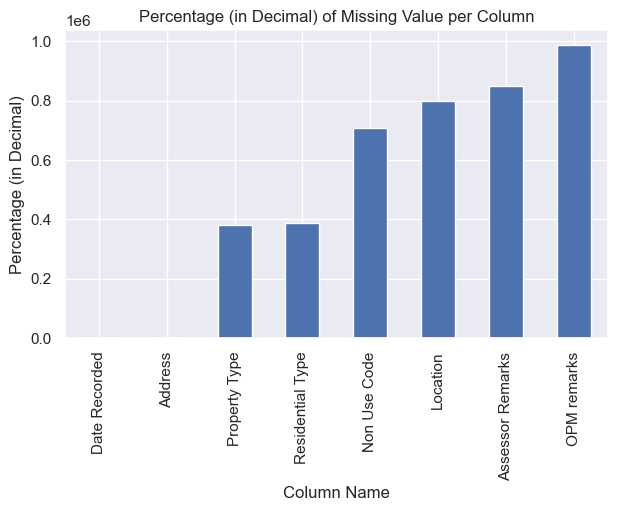

In [173]:
#graphicaly checking the missing values from the columns, representing them in percentage of missing.

df.set_index('Serial Number', inplace=True)

#missing values analysis
#count of total missing values
Totalmissing = df.isnull().sum()

#considering only missing values
Existmissing = Totalmissing[Totalmissing > 0]

#sorting them to desc order
Existmissing.sort_values(inplace=True)

#using histogram for representation
sns.set()
f, ax = plt.subplots(figsize=(7, 4))
Existmissing.plot.bar()
plt.title("Percentage (in Decimal) of Missing Value per Column")
plt.xlabel('Column Name') 
plt.ylabel('Percentage (in Decimal)') 
plt.show()

In [15]:
#checking the missing ratio of columns

missing_ratio = pd.DataFrame(columns=("Col", "missing_ratio"))

for i in list(df.columns):
    # reading of data until it is false

    x = (len(df)-df[i].count())/len(df)
    # Missing rate of each feature = (total length of data table - number of non-missing indicators)/indicator
    
    missing_ratio = missing_ratio.append([{"Col": i, "missing_ratio": x}], ignore_index=True)

missing_ratio = missing_ratio.sort_values('missing_ratio', ascending=False)
print(missing_ratio)

/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1398438878.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1398438878.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1398438878.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1398438878.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1398438878.py:11: FutureWarning: The frame.append method is deprecated 

                 Col  missing_ratio
11       OPM remarks       0.990038
10  Assessor Remarks       0.849717
12          Location       0.801750
9       Non Use Code       0.709509
8   Residential Type       0.389394
7      Property Type       0.383515
3            Address       0.000051
1      Date Recorded       0.000002
0          List Year       0.000000
2               Town       0.000000
4     Assessed Value       0.000000
5        Sale Amount       0.000000
6        Sales Ratio       0.000000


/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1398438878.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [16]:
#Dropping rows with null values for columns Address, Date Recorded
df = df.dropna(subset=['Date Recorded', 'Address'])

In [17]:
#dropping column that has high null values
df = df.drop(['OPM remarks', 'Non Use Code', 'Assessor Remarks', 'Location'], axis=1)

In [18]:
#dropping ADDRESS column as it is PII CLASSIFIED INFORMATION and is against the data ethics and law.
df = df.drop(['Address'], axis=1)

In [19]:
df

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
Serial Number,,,,,,,,
2020348,2020,09/13/2021,Ansonia,150500.0,325000.0,0.463000,Commercial,NaN
20002,2020,10/02/2020,Ashford,253000.0,430000.0,0.588300,Residential,Single Family
200212,2020,03/09/2021,Avon,130400.0,179900.0,0.724800,Residential,Condo
200243,2020,04/13/2021,Avon,619290.0,890000.0,0.695800,Residential,Single Family
200377,2020,07/02/2021,Avon,862330.0,1447500.0,0.595700,Residential,Single Family
...,...,...,...,...,...,...,...,...
190272,2019,06/24/2020,New London,60410.0,53100.0,1.137665,Single Family,Single Family
190284,2019,11/27/2019,Waterbury,68280.0,76000.0,0.898400,Single Family,Single Family
190129,2019,04/27/2020,Windsor Locks,121450.0,210000.0,0.578300,Single Family,Single Family


###### #Looking at the missing value ratio's and the graphical representatio of same it can be observed that OPM remarks has highest percentage of missing value 0.99. Since it does not contribute much to the dataset and is not correlated so it has been dropped. Similarly Assessor Remarks, Location has been dropped. As there is a very less percentage of values missing in Date Recorded and Address, it can be omitted from the data because it cannot be determined by the average of dates, addresses. Non Use code has significantly high ratio of missing value of 0.70 so dropped it as well.

<AxesSubplot:>

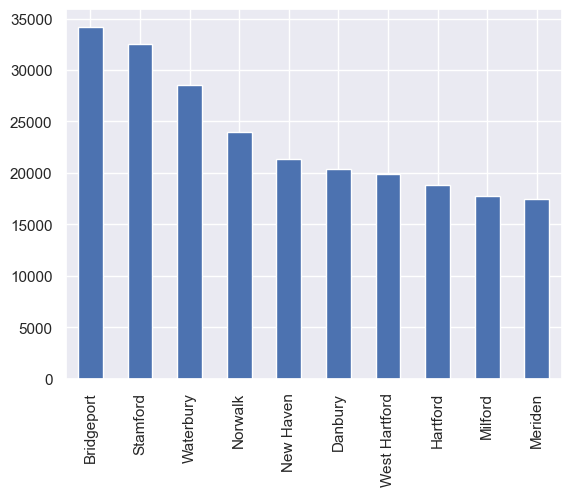

In [20]:
#sns.barplot(data=dfNT)
#plt.plot("Town", 10)
#plt.show()
#dfNT.hist(coloumn = 'Town')
df['Town'].value_counts()[:10].plot(kind='bar')

In [21]:
#data cleaning of coloumn town

tll = df['Town'].value_counts().index[:10].tolist()
df['Town'] = np.where(df['Town'].isin(tll), df['Town'], 'Other')

<AxesSubplot:>

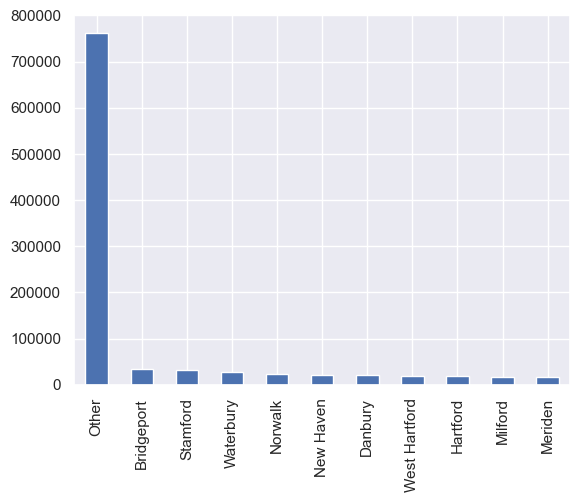

In [22]:
df['Town'].value_counts()[:11].plot(kind='bar')

In [23]:
df.Town.value_counts()

Other            762361
Bridgeport        34199
Stamford          32529
Waterbury         28505
Norwalk           23960
New Haven         21346
Danbury           20350
West Hartford     19854
Hartford          18808
Milford           17749
Meriden           17501
Name: Town, dtype: int64

In [24]:
dfNT=df
dfNT= dfNT[dfNT.Town != '***Unknown***']

In [25]:
dfNT['Town'].unique()

array(['Other', 'Danbury', 'Hartford', 'Milford', 'Norwalk', 'Meriden',
       'New Haven', 'Stamford', 'West Hartford', 'Waterbury',
       'Bridgeport'], dtype=object)

In [26]:
dfNT.Town.value_counts()

Other            762361
Bridgeport        34199
Stamford          32529
Waterbury         28505
Norwalk           23960
New Haven         21346
Danbury           20350
West Hartford     19854
Hartford          18808
Milford           17749
Meriden           17501
Name: Town, dtype: int64

##### #We first looked at the top 10 rows in column town, where Bridgeport had the highest number from all. Next we grouped the other towns in Connecticut and found out that they contributed more than 700000. The column had some ***Unknown*** vlaues, which donot contribute to the dataset and works as NA values so they have been removed from the column.

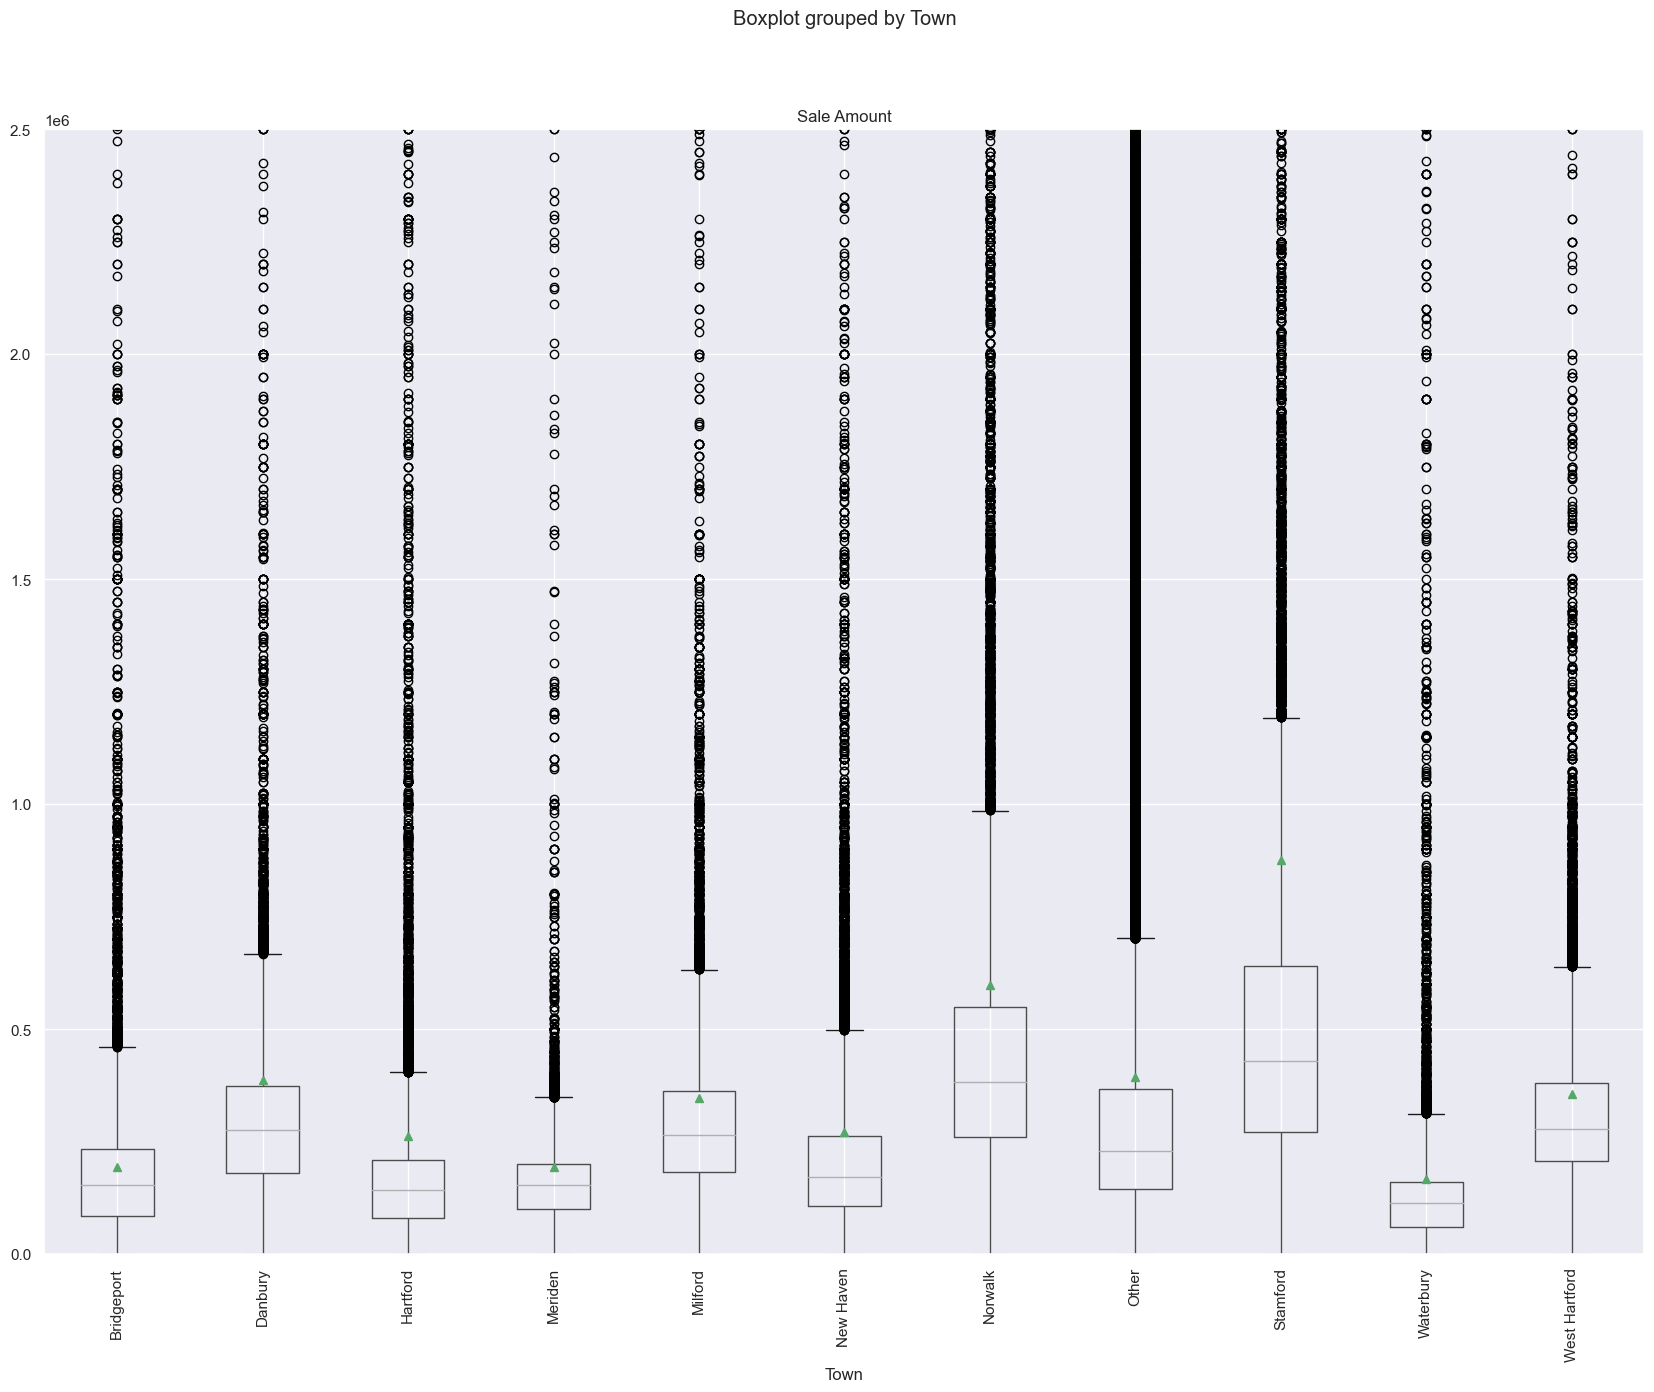

In [27]:
# Sale Amount Boxplot by Town
df.boxplot(column='Sale Amount', by='Town', figsize=(20, 15), showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0, 2500000)
plt.show()

In [28]:
dfs = df[['Sale Amount']].mean()
print(dfs)

Sale Amount    391157.432025
dtype: float64


##### #The boxplot gives us the information about the sales according to the towns, from which it can be observed that Stamford has the highest distribution of sales on the other hand waterbury has the lowest sales. It can also be observed that Hartford has less sales in comparision to Stamford which is the downtown of Connecticut. From the above the mean average of town sales is ~390,000.

In [29]:
# Date conversion
df['Date'] = df['Date Recorded'].str[:10]
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].describe()

/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1748390208.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                  997162
unique                   6387
top       2005-07-01 00:00:00
freq                      877
first     1999-04-05 00:00:00
last      2021-09-30 00:00:00
Name: Date, dtype: object

##### #We have checked for date count, unique values and the frequency.

In [30]:
#aggregating the daily average sales amount

daily = df.groupby([df['Date']], as_index=True)['Sale Amount'].mean()

In [31]:
daily

Date
1999-04-05    9.500000e+04
2001-08-01    6.350000e+05
2001-08-23    5.580000e+05
2001-09-04    8.800000e+04
2001-09-05    2.560000e+05
                  ...     
2021-09-24    4.606288e+05
2021-09-27    3.976125e+05
2021-09-28    1.303942e+06
2021-09-29    3.759601e+05
2021-09-30    4.750053e+05
Name: Sale Amount, Length: 6387, dtype: float64

In [32]:
#aggregating the monthly average sales amount

monthly = daily.groupby(pd.Grouper(freq='M')).mean()

In [33]:
monthly

Date
1999-04-30    9.500000e+04
1999-05-31             NaN
1999-06-30             NaN
1999-07-31             NaN
1999-08-31             NaN
                  ...     
2021-05-31    4.844208e+05
2021-06-30    5.068499e+05
2021-07-31    6.180559e+05
2021-08-31    1.336546e+06
2021-09-30    4.761536e+05
Freq: M, Name: Sale Amount, Length: 270, dtype: float64

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Assessed Value', ylabel='Sale Amount'>

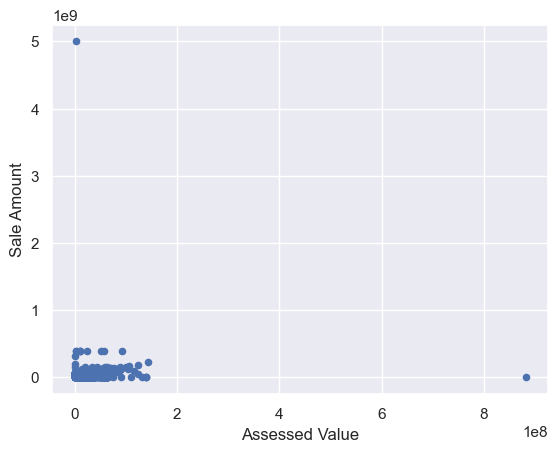

In [113]:
df.plot.scatter(x='Assessed Value',y='Sale Amount',colormap='viridis')

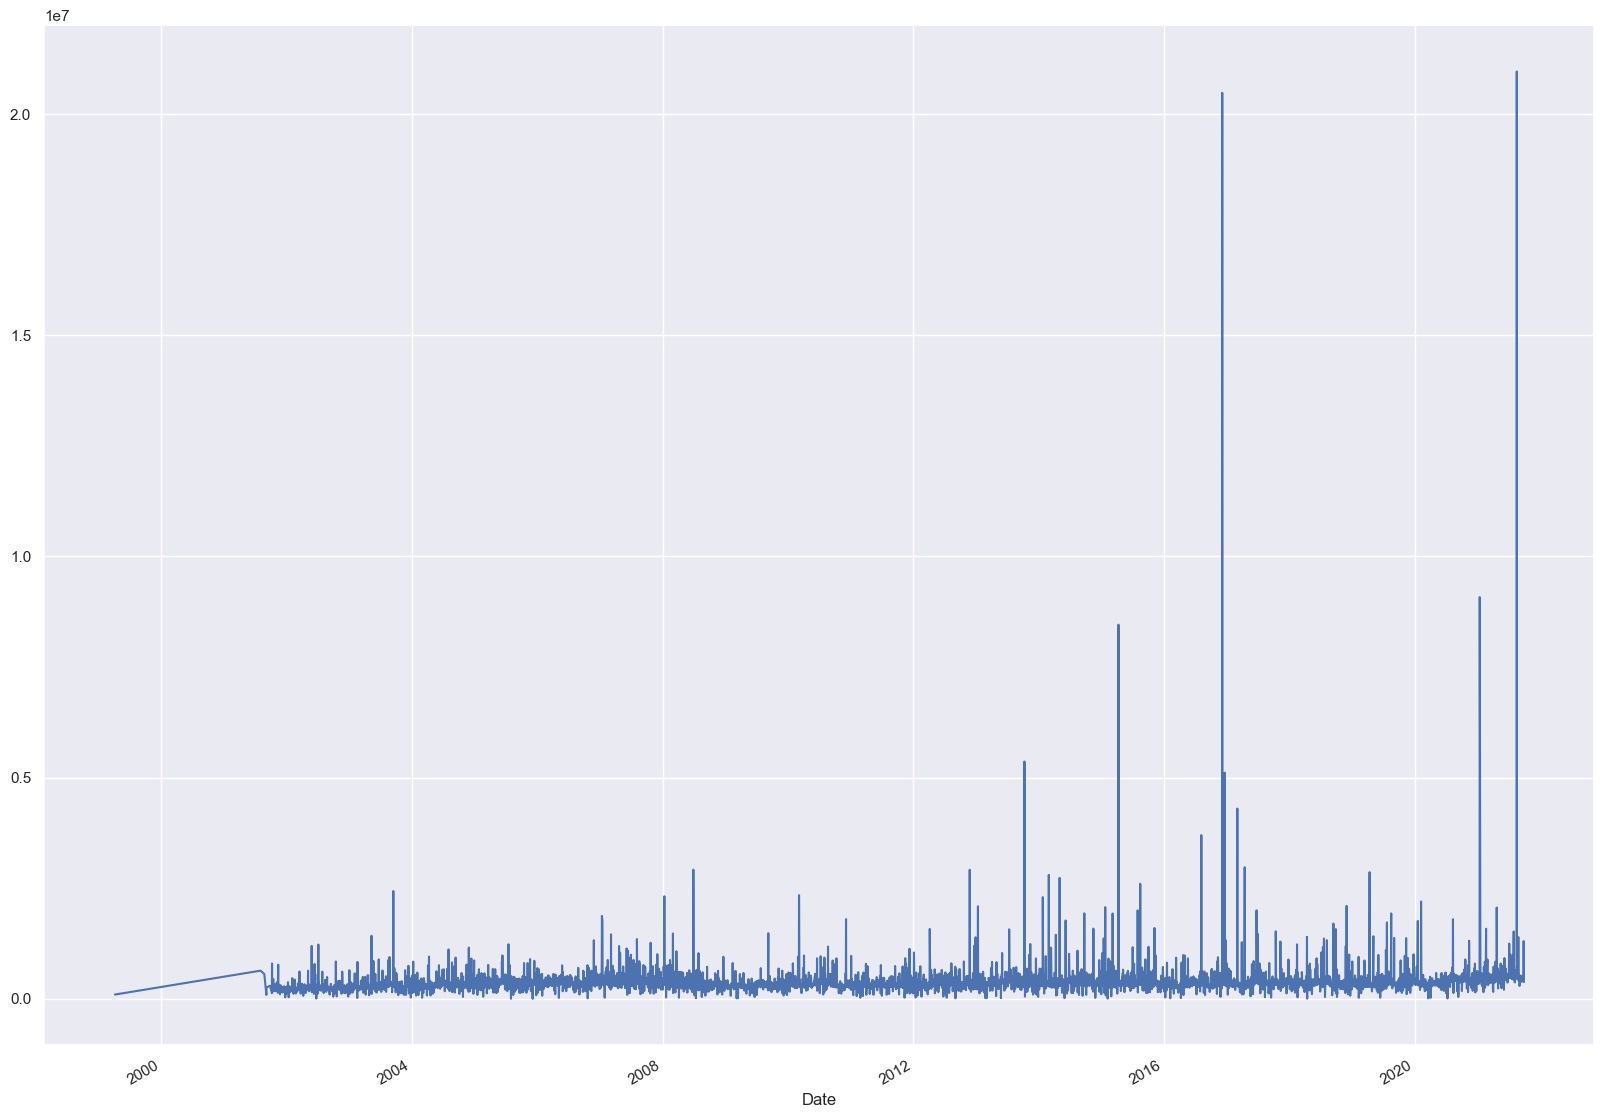

In [34]:
#daily average plot
plt.figure(figsize=(20, 15))
ax = daily.plot(kind='line')
plt.show()

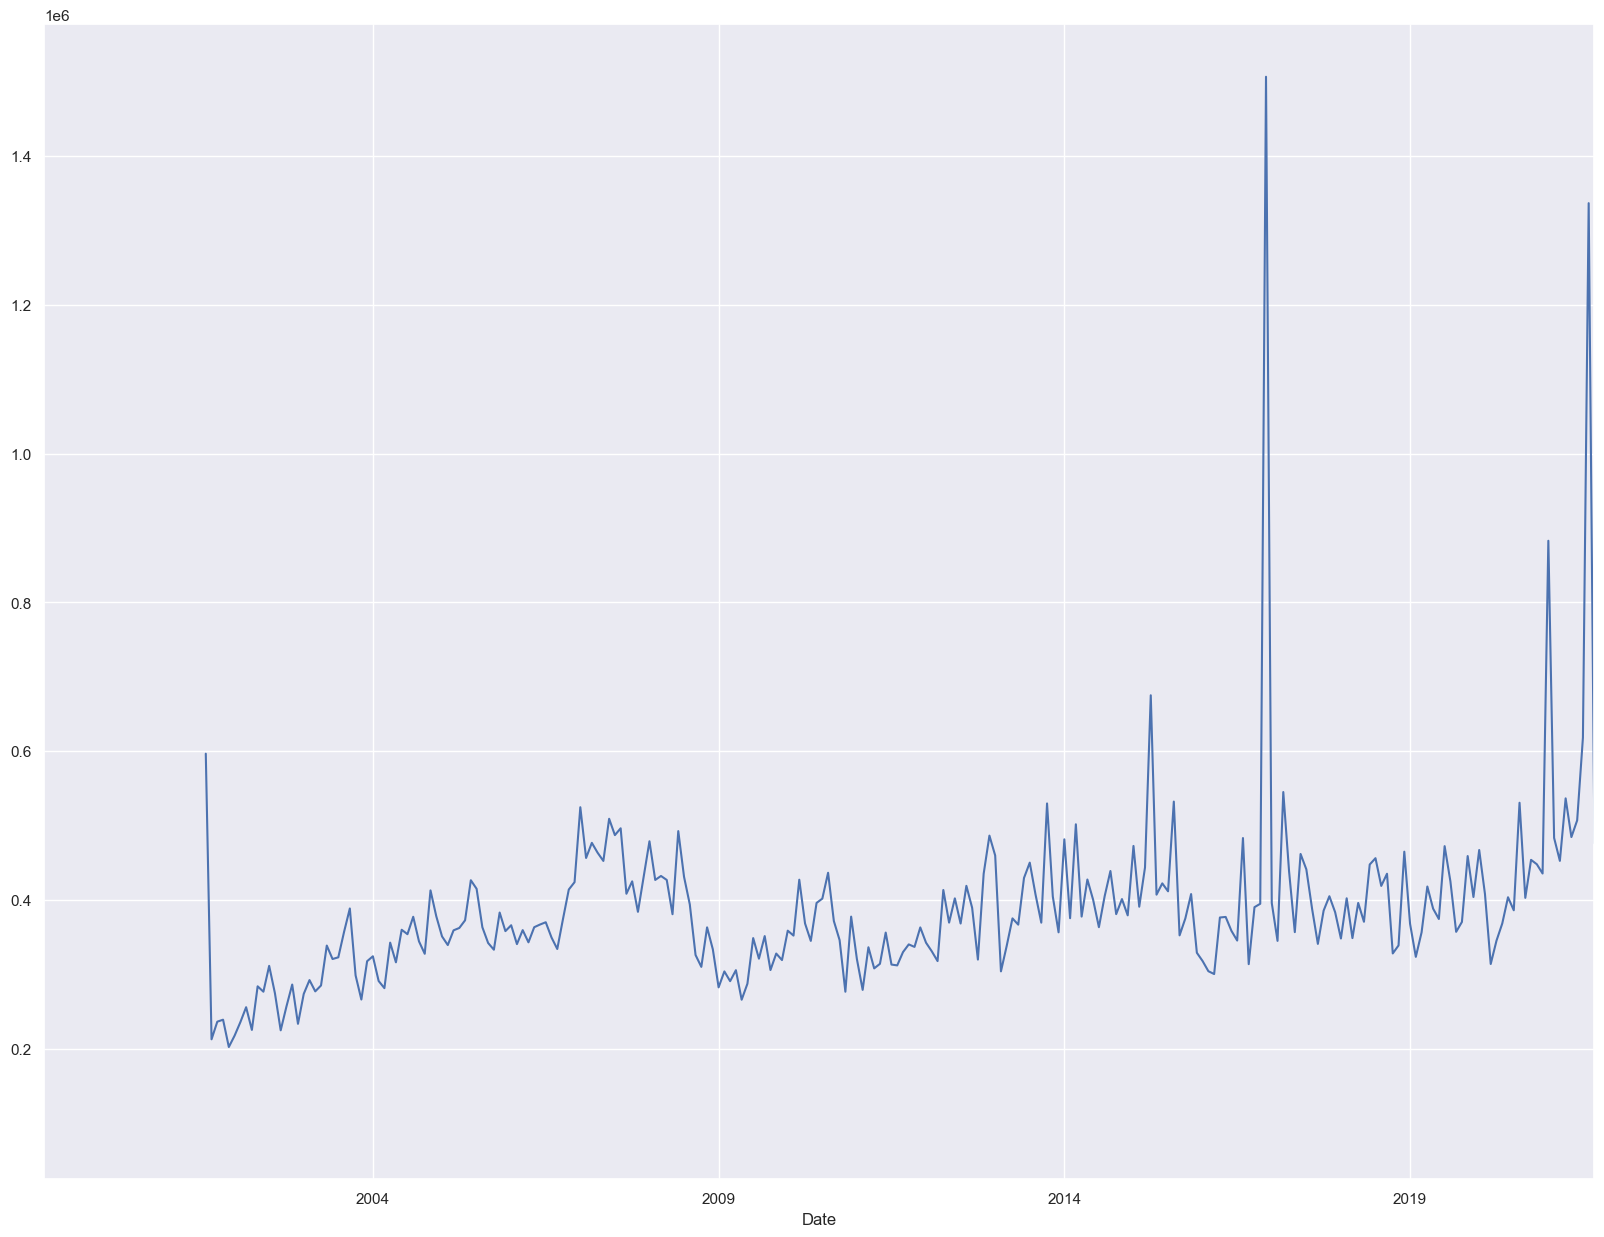

In [35]:
#monthly average plot
plt.figure(figsize=(20, 15))
ax1 = monthly.plot(kind='line')
plt.show()

In [36]:
# grouping the listed year, town, assessed value, sales value, sales ratio, property type, residential type
df1 = pd.DataFrame(df.groupby('List Year')['Assessed Value'].mean())
df1.reset_index(inplace=True)

In [37]:
df1

,List Year,Assessed Value
0,2001,138930.363432
1,2002,177440.026776
2,2003,188087.164435
3,2004,214334.873802
4,2005,198068.671840
5,2006,338281.166509
6,2007,334548.775079
7,2008,292110.829388
8,2009,338422.314482
9,2010,307099.145621


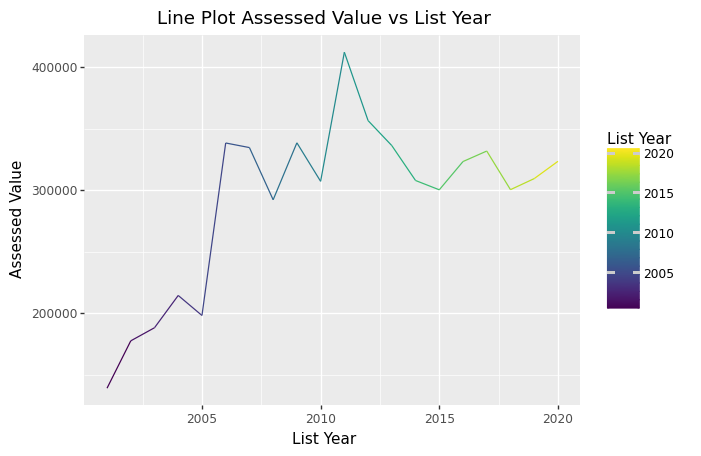

<ggplot: (8792965466612)>

In [140]:
ggplot(df1, aes(x='List Year', y='Assessed Value', color = 'List Year')) + geom_line()+ ggtitle("Line Plot Assessed Value vs List Year")

##### #we now aggregrate the data in order to understand the daily, monthly, annual sales view point. According to the daily average plot it represents a very noisy graph, the monthly data graph is then refined comparatively, on the other hand yearly plot gives us comprehensible information that there has been striking grwoth in the sales. Past the year 2005 marked the highest sales of the decade, whereas there was a glaring drop post that, 2020 had less sales compartively to 2007. It can also be considered that the sales had come down in 2019-2020 due to COVID-19. The skyhigh sales is seen in 2021 crossing the sales in 2007 to more than 600,000.

In [39]:
df2 = pd.DataFrame(df.groupby('Residential Type')['Sale Amount'].mean())
df2.reset_index(inplace=True)

In [40]:
df2

,Residential Type,Sale Amount
0,Condo,277242.108559
1,Four Family,314931.857734
2,Single Family,400790.552227
3,Three Family,203695.502356
4,Two Family,206955.189706


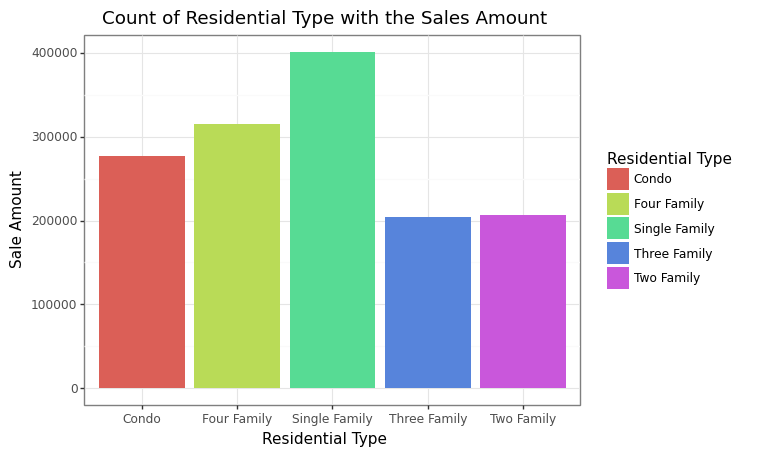

<ggplot: (8793018318255)>

In [41]:
ggplot(df2, aes('Residential Type','Sale Amount', fill = 'Residential Type', label='Sale Amount'))+labs(title="Count of Residential Type with the Sales Amount")+geom_bar(stat="identity")+theme_bw()



In [42]:
df3 = pd.DataFrame(df.groupby('Property Type')['Sale Amount'].mean())
df3.reset_index(inplace=True)

In [43]:
df3

,Property Type,Sale Amount
0,Apartments,1.283431e+07
1,Commercial,1.788884e+06
2,Condo,2.602087e+05
3,Four Family,3.142910e+05
4,Industrial,2.004287e+06
5,Public Utility,3.697088e+05
6,Residential,4.793562e+05
7,Single Family,3.885145e+05
8,Three Family,1.798445e+05
9,Two Family,1.990437e+05


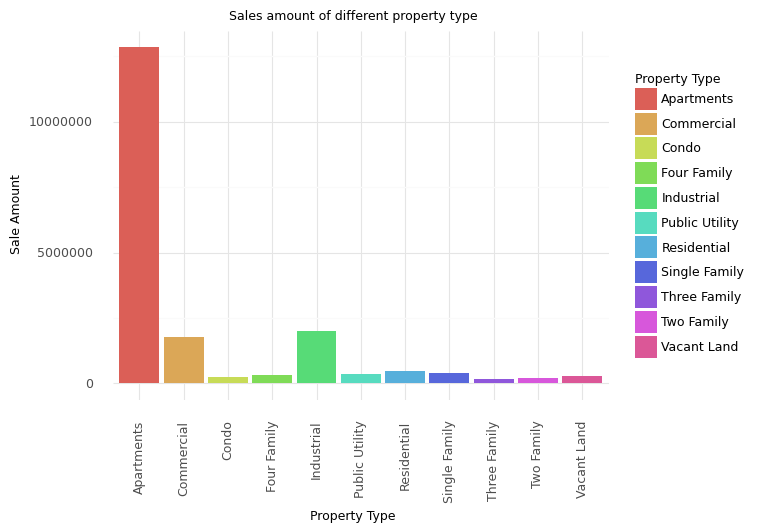

<ggplot: (8793018319261)>

In [44]:
#plt.figure(figsize=(9,3))
ggplot(df3, aes(x='Property Type', y='Sale Amount', fill = 'Property Type'))+labs(title="Sales amount of different property type") + geom_bar(stat="identity")+theme_minimal()+theme(text = element_text(size = 9), axis_text_x = element_text(angle = 90))



In [45]:
dfYT = pd.DataFrame(dfNT.groupby(['List Year', 'Town'])['Assessed Value'].mean())
dfYT.reset_index(inplace=True)

In [46]:
dfYT

,List Year,Town,Assessed Value
0,2001,Bridgeport,163971.594019
1,2001,Danbury,125894.178357
2,2001,Hartford,114426.036559
3,2001,Milford,144191.697931
4,2001,New Haven,61005.000000
...,...,...,...
184,2020,Norwalk,481128.097826
185,2020,Other,322586.661592
186,2020,Stamford,735464.062919
187,2020,Waterbury,101883.865409


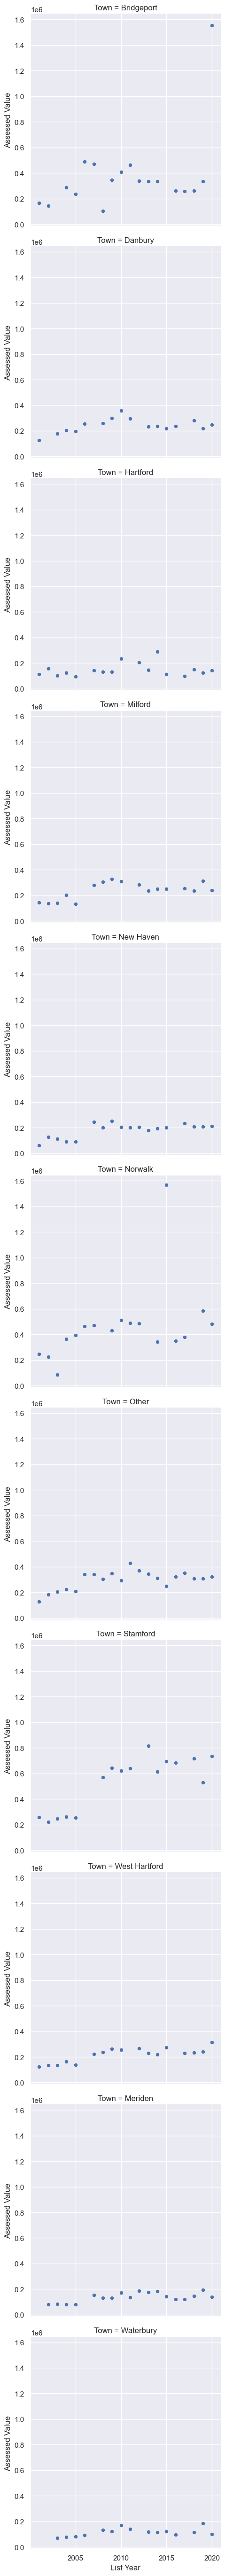

In [47]:
sns.relplot(
    data=dfYT,
    x="List Year", y="Assessed Value", row="Town"
)

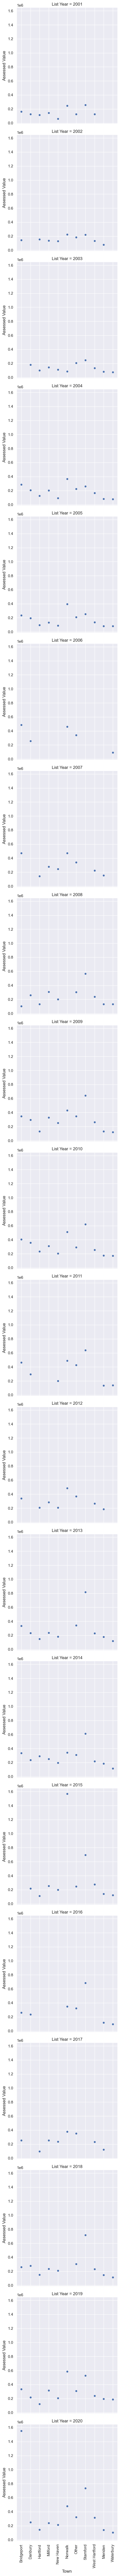

In [48]:
s = sns.relplot(
    data=dfYT,
    x="Town", y="Assessed Value", row="List Year"
)
s.set_xticklabels(rotation=90)

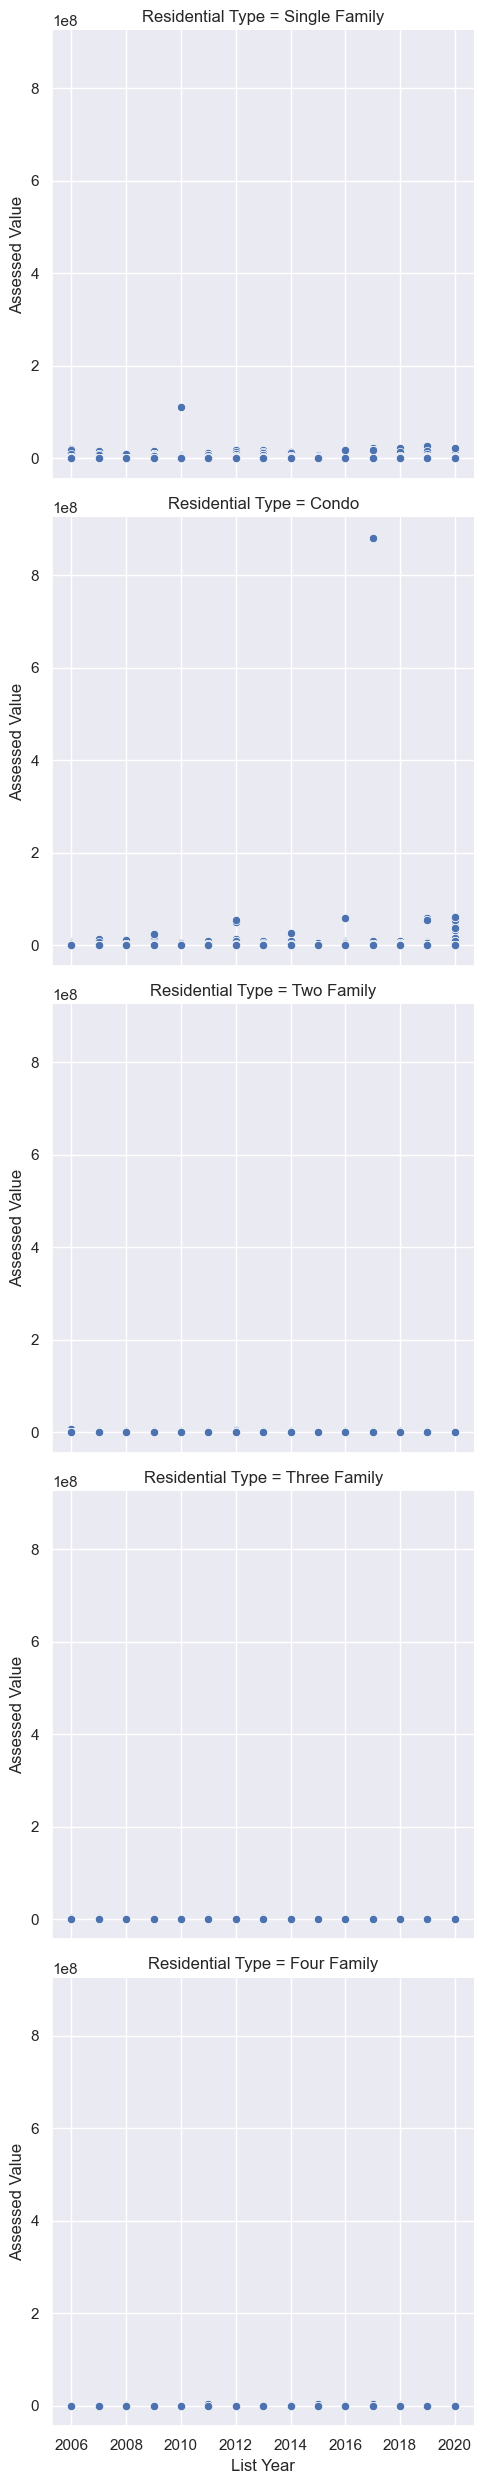

In [49]:
sns.relplot(
    data=df,
    x="List Year", y="Assessed Value", row="Residential Type"
)

In [50]:
 dfNT.columns.values.tolist()

['List Year',
 'Date Recorded',
 'Town',
 'Assessed Value',
 'Sale Amount',
 'Sales Ratio',
 'Property Type',
 'Residential Type']

KeyboardInterrupt: 

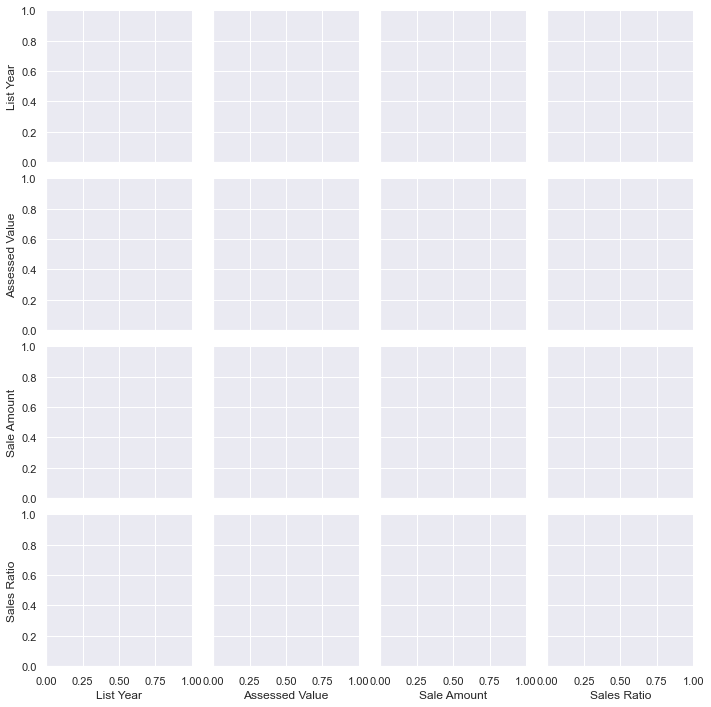

In [189]:
sns.pairplot(data=df, hue="Residential Type")

##### #Here we loook at the sales values of Residential type, the highest is observed for single family with 400,000 which is followed by four family. Apartments have the outrageous sales in property type crossing over 10,000,000. The next graph fills us with the pouring information about the sales per town per listed years, out of which Greenwich, New Cannan had the soaring sales of all the towns in Connecticut. While if we see the same data for every year, it is very disturbing. Condo has the exorbitant sales in the year 2017.

In [190]:
def filnafuc(dat, g, h):
    """
    :param g: column name which you want missing values to be filled
    :param h: variable which you want to fill the rows with
    :return: the column with missing values filled with desired value
    """
    return dat[g].fillna(h, inplace=True)

In [191]:
# Fill missing values
filnafuc(df, 'Residential Type', 'Single Family')
filnafuc(df, 'Property Type', 'Residential')

In [192]:
print(df.describe(include=[np.object]))

/var/folders/2c/y6zq61w501xdsp_y7nf8tgbc0000gn/T/ipykernel_95497/349345008.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


       Date Recorded    Town Property Type Residential Type
count         997162  997162        997162           997162
unique          6387      11            11                5
top       07/01/2005   Other   Residential    Single Family
freq             877  762361        443127           833276


##### #Filling the na data cols Residential Type with Single Family and Property Type with Residential

In [193]:
# Locating and dropping duplicate rows
print('Duplicate rows before deletion : ', sum(df.duplicated(df.columns)))

Duplicate rows before deletion :  10670


##### #Since we donot have any duplicate rows, no deletion.

In [194]:
# Locating maximum Sale amount
m = df['Sale Amount'].max()
df[df['Sale Amount'] == m]

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Date
Serial Number,,,,,,,,,
20200091,2020,08/19/2021,Other,2238530.0,5.000000e+09,0.000448,Apartments,Single Family,2021-08-19


In [195]:
# Locating maximum Sale ratio
o = df['Sales Ratio'].max()
df[df['Sales Ratio'] == o]

,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Date
Serial Number,,,,,,,,,
60043,2006,03/19/2007,Other,1226420.0,1.0,1226420.0,Single Family,Single Family,2007-03-19


##### #From above it is understood that the highest sales amount is >50000000 where as its sales ratio is 0% contradicting to it the sales ratio of 60043 serial number has the sales amount of $1.

In [198]:
# cheking the sales ratio per listed year
pd.crosstab(df['Residential Type'], df['List Year'])

List Year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Residential Type,,,,,,,,,,,,,,,,,,,,
Condo,0,0,0,0,0,9584,6538,6004,7845,5818,5151,5645,7078,8577,8053,9015,7179,9000,9932,12360
Four Family,0,0,0,0,0,100,97,121,168,158,137,116,146,166,188,138,174,204,237,268
Single Family,59582,59680,64232,84027,61601,36044,26793,24242,31179,24936,23692,28207,30134,37770,35528,37877,35502,37836,45146,49268
Three Family,0,0,0,0,0,990,627,832,1181,941,698,599,881,951,870,799,822,1167,1228,1495
Two Family,0,0,0,0,0,2060,1562,1536,2135,1638,1387,1406,1704,2099,2012,1944,2011,2502,2411,3201


In [200]:
#df.columns
for col in df.columns:
    print(col)

List Year
Date Recorded
Town
Assessed Value
Sale Amount
Sales Ratio
Property Type
Residential Type
Date


# Using Machine Learning Algorithms 

In [201]:
#displyaing the correlation matrix
cor_mat = df.corr()
cor_mat

,List Year,Assessed Value,Sale Amount,Sales Ratio
List Year,1.000000,0.030087,0.010070,-0.003304
Assessed Value,0.030087,1.000000,0.110962,0.003943
Sale Amount,0.010070,0.110962,1.000000,-0.000377
Sales Ratio,-0.003304,0.003943,-0.000377,1.000000


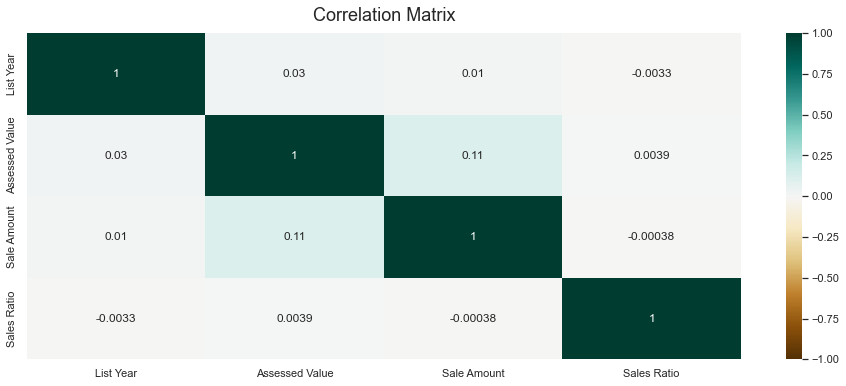

In [203]:
#cor_mat = dfRem.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Matrix', fontdict={'fontsize':18}, pad=12);

In [226]:
# One hot encoding
dfe = pd.get_dummies(df, columns=['Town', 'Property Type', 'Residential Type'])

In [227]:
print(dfe.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997162 entries, 2020348 to 190344
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   List Year                       997162 non-null  int64         
 1   Date Recorded                   997162 non-null  object        
 2   Assessed Value                  997162 non-null  float64       
 3   Sale Amount                     997162 non-null  float64       
 4   Sales Ratio                     997162 non-null  float64       
 5   Date                            997162 non-null  datetime64[ns]
 6   Town_Bridgeport                 997162 non-null  uint8         
 7   Town_Danbury                    997162 non-null  uint8         
 8   Town_Hartford                   997162 non-null  uint8         
 9   Town_Meriden                    997162 non-null  uint8         
 10  Town_Milford                    997162 non-null  u

In [222]:
def dropcol(dt, j):
    """
    :param dat: data frame to drop column from
    :param j: column to drop
    :return: data frame with dropped column
    """
    return dt.drop(j, axis=1, inplace=True)

In [228]:
dfee = dfe

In [229]:
# Drop unusable variables
dropcol(dfee,'Date Recorded')
dropcol(dfee,'Date')
dfee = dfee.dropna()

In [230]:
print(dfee.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997162 entries, 2020348 to 190344
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   List Year                       997162 non-null  int64  
 1   Assessed Value                  997162 non-null  float64
 2   Sale Amount                     997162 non-null  float64
 3   Sales Ratio                     997162 non-null  float64
 4   Town_Bridgeport                 997162 non-null  uint8  
 5   Town_Danbury                    997162 non-null  uint8  
 6   Town_Hartford                   997162 non-null  uint8  
 7   Town_Meriden                    997162 non-null  uint8  
 8   Town_Milford                    997162 non-null  uint8  
 9   Town_New Haven                  997162 non-null  uint8  
 10  Town_Norwalk                    997162 non-null  uint8  
 11  Town_Other                      997162 non-null  uint8  
 12  Town_Stamf

In [239]:
#dividing the data to test and train sets

x_train = dfee.loc[:, dfee.columns != 'Sale Amount']
y_train = dfee['Sale Amount']
# Divide training sets and test sets
train_X, test_X, train_y, test_y = train_test_split(x_train, y_train, train_size=.8, random_state=3)

In [212]:
#dividing the data to test and train sets

x_train1 = dfe.loc[:, dfe.columns != 'Sale Amount']
y_train1 = dfe['Sale Amount']
# Divide training sets and test sets
train_X1, test_X1, train_y1, test_y1 = train_test_split(x_train1, y_train1, train_size=.8, random_state=3)

##### #we split the data into training and testing set, where 80% of it goes to training set and 20% splits into testing set. The predictor variable is sales amount where as the other variables are independent.

## Linear Regression

In [240]:
lm = LinearRegression()
lm.fit(train_X, train_y)
lm.score(test_X, test_y)

0.09307071857183669

In [241]:
# Predict using test data
yPred = lm.predict(test_X)

In [242]:
from sklearn.metrics import r2_score
acqSc =r2_score(test_y, yPred)
acqSc

0.09307071857183669

In [244]:
lm.fit

<bound method LinearRegression.fit of LinearRegression()>

In [245]:
y_predict = lm.predict(test_X)
mse = mean_squared_error(y_predict, test_y)
rmse = np.sqrt(mse)
print(mse)
print(rmse)

2821916337746.8477
1679856.046733424


## Decission Tree

In [246]:
tree_reg = DecisionTreeRegressor(random_state=3)
tree1 = tree_reg.fit(train_X, train_y)
sale_mount_pre = tree_reg.predict(test_X)
tree_mse = mean_squared_error(test_y, sale_mount_pre)
tree_rmse = np.sqrt(tree_mse)
print(tree_mse)
print(tree_rmse)

122937738170655.28
11087729.171054607


In [247]:
scores = cross_val_score(tree_reg, train_X, train_y, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)
print(rmse_scores)
print(rmse_scores.mean())
print(tree_reg.score(test_X, test_y))

[17727327.46611346  1244453.02195684   284382.63246621   440154.19284351
  1656084.06821709   441066.16701275   390806.5165657   1386867.88535825
   710107.61813314 25023080.90863046]
4930433.04772974
-38.51068040115593


In [248]:
print(dict(zip(train_X.columns, tree1.feature_importances_)))

{'List Year': 0.0035718388984215584, 'Assessed Value': 0.04496906913530978, 'Sales Ratio': 0.09538031161347175, 'Town_Bridgeport': 4.369154286952074e-05, 'Town_Danbury': 8.496400126750351e-07, 'Town_Hartford': 1.1685953125560175e-06, 'Town_Meriden': 6.824411361574736e-07, 'Town_Milford': 3.504031409626881e-08, 'Town_New Haven': 2.9514650646967332e-06, 'Town_Norwalk': 0.0005629206370000207, 'Town_Other': 0.0018614145308882704, 'Town_Stamford': 0.02250768915300379, 'Town_Waterbury': 5.2959453784656925e-08, 'Town_West Hartford': 3.272139824312988e-07, 'Property Type_Apartments': 0.8298925058343686, 'Property Type_Commercial': 1.7037013517042103e-05, 'Property Type_Condo': 2.714021017531347e-06, 'Property Type_Four Family': 0.00029095298393745547, 'Property Type_Industrial': 1.534935673073699e-10, 'Property Type_Public Utility': 5.0002005518445195e-15, 'Property Type_Residential': 8.250111907044929e-05, 'Property Type_Single Family': 6.68128261460894e-07, 'Property Type_Three Family': 2.72

## K- Means

In [249]:
df.to_csv("RealEstateS_Clean.csv", sep=",")

## Attempt at Machine Learning

In [115]:
dfML = pd.read_csv('Real_Estate_Sales_2001-2020_GL.csv')

/var/folders/58/1g82t0y904j4mjghqw83krj00000gn/T/ipykernel_17065/1013537928.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.


In [116]:
print(dfML.isnull().sum())

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Address                 51
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
Non Use Code        707532
Assessor Remarks    847349
OPM remarks         987279
Location            799516
dtype: int64


In [117]:
dfML

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.588300,Residential,Single Family,NaN,NaN,NaN,NaN
2,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.0,179900.0,0.724800,Residential,Condo,NaN,NaN,NaN,NaN
3,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.0,890000.0,0.695800,Residential,Single Family,NaN,NaN,NaN,NaN
4,200377,2020,07/02/2021,Avon,70 FAR HILLS DRIVE,862330.0,1447500.0,0.595700,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.0,53100.0,1.137665,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.0,76000.0,0.898400,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
997210,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.0,210000.0,0.578300,Single Family,Single Family,NaN,NaN,NaN,NaN
997211,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.0,280000.0,0.726300,Single Family,Single Family,NaN,NaN,NaN,NaN


In [118]:
dfML = dfML.drop(['Address','OPM remarks', 'Non Use Code', 'Assessor Remarks', 'Location'], axis=1)

In [119]:
print(dfML.isnull().sum())

Serial Number            0
List Year                0
Date Recorded            2
Town                     0
Assessed Value           0
Sale Amount              0
Sales Ratio              0
Property Type       382446
Residential Type    388309
dtype: int64


In [120]:
dfMLNADrop = dfML.dropna(subset=['Property Type', 'Residential Type'])

In [121]:
print(dfMLNADrop.isnull().sum())

Serial Number       0
List Year           0
Date Recorded       0
Town                0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
dtype: int64


In [122]:
dfMLNADrop

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type
1,20002,2020,10/02/2020,Ashford,253000.0,430000.0,0.588300,Residential,Single Family
2,200212,2020,03/09/2021,Avon,130400.0,179900.0,0.724800,Residential,Condo
3,200243,2020,04/13/2021,Avon,619290.0,890000.0,0.695800,Residential,Single Family
4,200377,2020,07/02/2021,Avon,862330.0,1447500.0,0.595700,Residential,Single Family
5,200109,2020,12/09/2020,Avon,847520.0,1250000.0,0.678000,Residential,Single Family
...,...,...,...,...,...,...,...,...,...
997207,190272,2019,08/03/2020,Wilton,681870.0,1134708.0,0.600900,Single Family,Single Family
997208,190272,2019,06/24/2020,New London,60410.0,53100.0,1.137665,Single Family,Single Family
997209,190284,2019,11/27/2019,Waterbury,68280.0,76000.0,0.898400,Single Family,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,121450.0,210000.0,0.578300,Single Family,Single Family


In [123]:
dfMLNADrop['Property Type'].unique()

array(['Residential', 'Condo', 'Two Family', 'Three Family',
       'Single Family', 'Four Family'], dtype=object)

In [124]:
dfMLNADrop['Residential Type'].unique() # Dropping Residential Type as the same information is available 

array(['Single Family', 'Condo', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [125]:
dfMLNADrop = dfMLNADrop.drop(['Residential Type'], axis=1)

In [126]:
dfMLNADrop

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type
1,20002,2020,10/02/2020,Ashford,253000.0,430000.0,0.588300,Residential
2,200212,2020,03/09/2021,Avon,130400.0,179900.0,0.724800,Residential
3,200243,2020,04/13/2021,Avon,619290.0,890000.0,0.695800,Residential
4,200377,2020,07/02/2021,Avon,862330.0,1447500.0,0.595700,Residential
5,200109,2020,12/09/2020,Avon,847520.0,1250000.0,0.678000,Residential
...,...,...,...,...,...,...,...,...
997207,190272,2019,08/03/2020,Wilton,681870.0,1134708.0,0.600900,Single Family
997208,190272,2019,06/24/2020,New London,60410.0,53100.0,1.137665,Single Family
997209,190284,2019,11/27/2019,Waterbury,68280.0,76000.0,0.898400,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,121450.0,210000.0,0.578300,Single Family


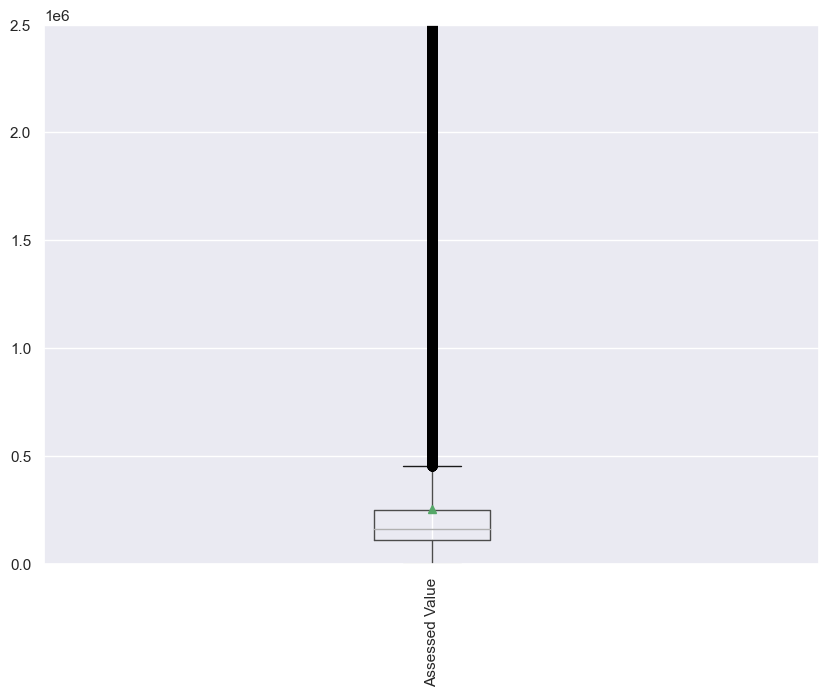

In [70]:
dfMLNADrop.boxplot(column='Assessed Value', figsize=(10, 7), showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0, 2500000)
plt.show()

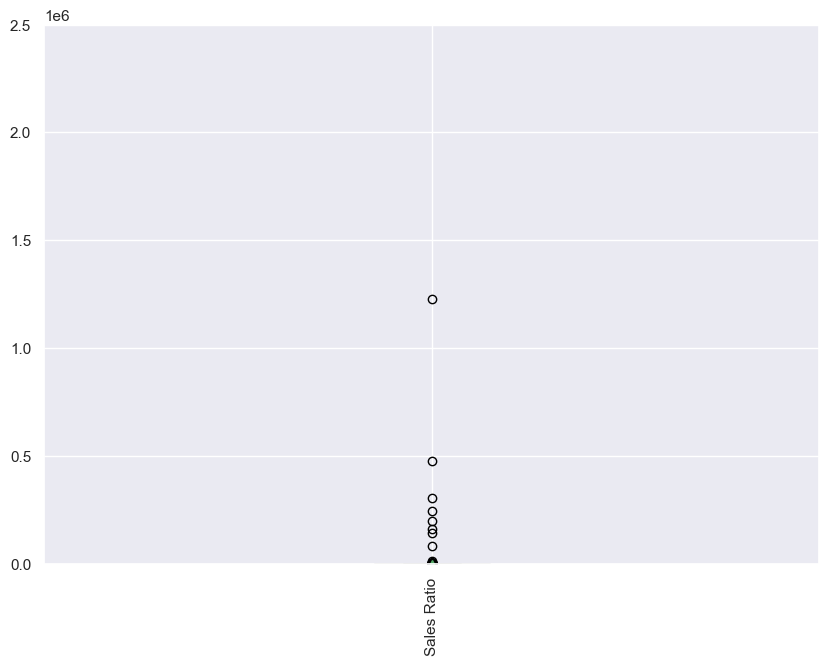

In [71]:
dfMLNADrop.boxplot(column='Sales Ratio', figsize=(10, 7), showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0, 2500000)
plt.show()

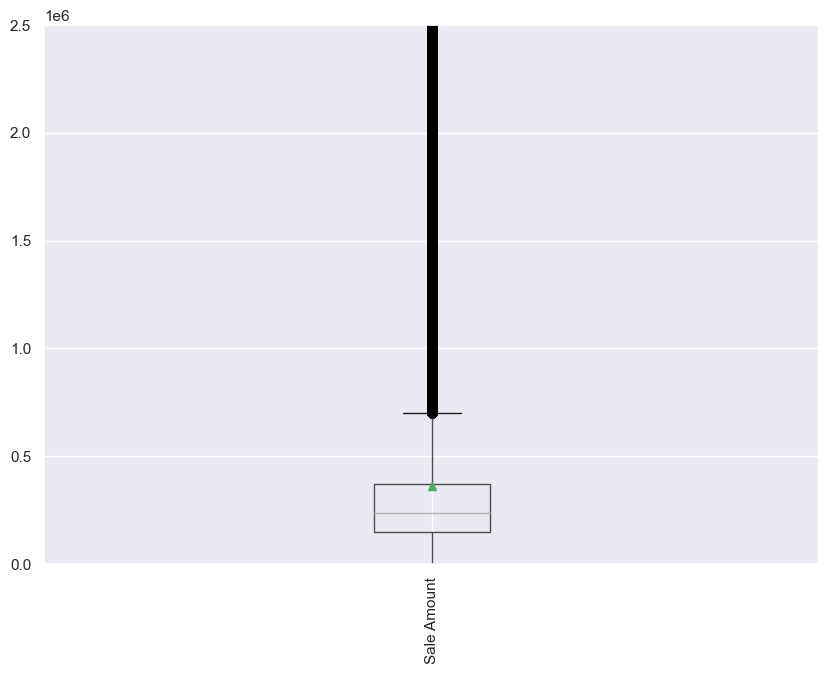

In [69]:
dfMLNADrop.boxplot(column='Sale Amount', figsize=(10, 7), showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0, 2500000)
plt.show()

In [90]:
ASQ1 = np.percentile(dfMLNADrop['Assessed Value'], 25,
                   interpolation = 'midpoint')
ASQ3 = np.percentile(dfMLNADrop['Assessed Value'], 75,
                   interpolation = 'midpoint')
ASIQR = ASQ3 - ASQ1
ASupper = ASQ3+1.5*ASIQR
ASlower = ASQ1-1.5*ASIQR

In [91]:
SAQ1 = np.percentile(dfMLNADrop['Sale Amount'], 25,
                   interpolation = 'midpoint')
 
SAQ3 = np.percentile(dfMLNADrop['Sale Amount'], 75,
                   interpolation = 'midpoint')

SAIQR = SAQ3 - SAQ1

SAupper = SAQ3+1.5*SAIQR
SAlower = SAQ1-1.5*SAIQR

In [92]:
SRQ1 = np.percentile(dfMLNADrop['Sales Ratio'], 25,
                   interpolation = 'midpoint')
 
SRQ3 = np.percentile(dfMLNADrop['Sales Ratio'], 75,
                   interpolation = 'midpoint')

SRIQR = SRQ3 - SRQ1

SRupper = SRQ3+1.5*SRIQR
SRlower = SRQ1-1.5*SRIQR

In [ ]:
outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]

In [107]:
dfNewOut = dfMLNADrop.loc[dfMLNADrop['Assessed Value'] > ASupper]
#dfNewOut = dfNewOut.loc[dfNewOut['Assessed Value'] < ASlower]
#dfNewOut = dfNewOut.loc[dfNewOut['Sale Amount'] > SAupper]
#dfNewOut = dfNewOut.loc[dfNewOut['Sale Amount'] < SAlower]
dfNewOut = dfNewOut.loc[dfNewOut['Sales Ratio'] > SRupper]
#dfNewOut = dfNewOut.loc[dfNewOut['Sales Ratio'] < SRlower]


##### If we utilized all the outlier removals, there wouldn't be any records remaining

In [99]:
ASupper

454560.0

In [100]:
ASlower

-96000.0

In [108]:
dfNewOut

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type
974,200369,2020,12/15/2020,Greenwich,462980.0,200000.00,2.314900,Residential
2015,200074,2020,10/16/2020,Greenwich,1440110.0,300000.00,4.800300,Residential
2043,20050,2020,10/26/2020,Darien,1313830.0,925000.00,1.420300,Residential
2216,201242,2020,06/24/2021,Greenwich,54118680.0,435000.00,124.410759,Residential
2489,200190,2020,07/20/2021,Essex,576300.0,462500.00,1.246000,Residential
...,...,...,...,...,...,...,...,...
995887,190147,2019,01/28/2020,Westport,503600.0,355388.00,1.417000,Single Family
996591,190683,2019,09/28/2020,Westport,719000.0,430000.00,1.672100,Single Family
996667,190195,2019,03/16/2020,Westport,569900.0,385000.00,1.480300,Single Family
996863,190134,2019,04/07/2020,Wilton,670250.0,149470.00,4.484200,Single Family


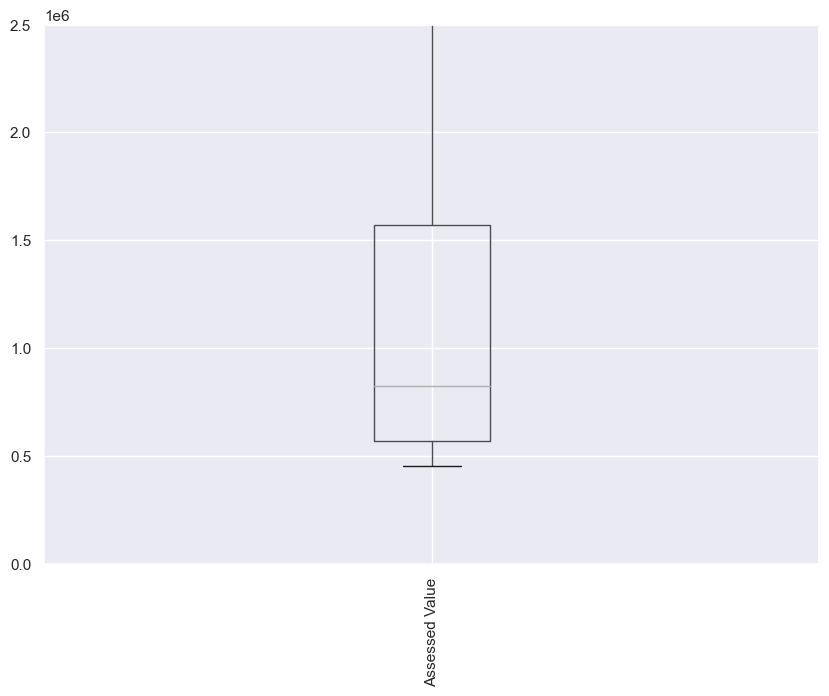

In [109]:
dfNewOut.boxplot(column='Assessed Value', figsize=(10, 7), showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0, 2500000)
plt.show()

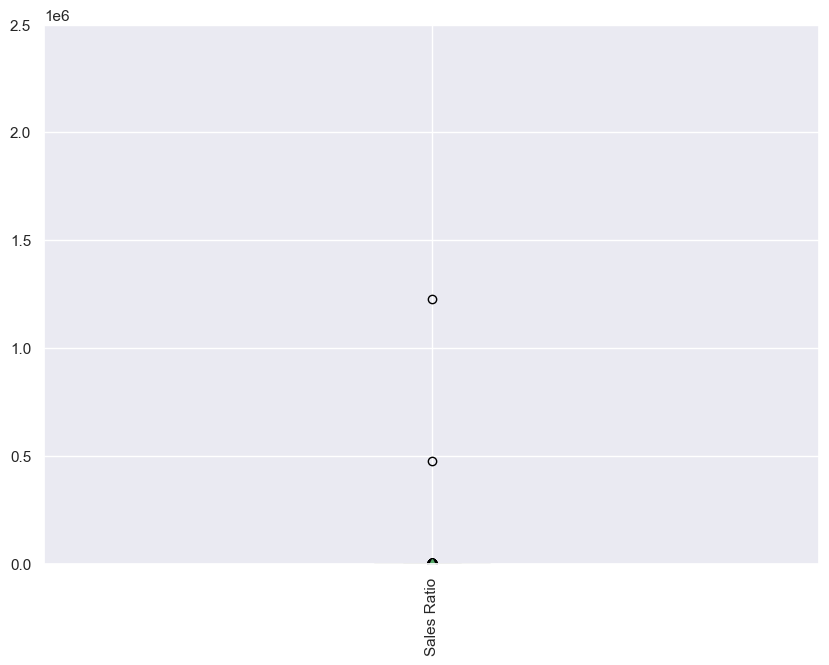

In [110]:
dfNewOut.boxplot(column='Sales Ratio', figsize=(10, 7), showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0, 2500000)
plt.show()

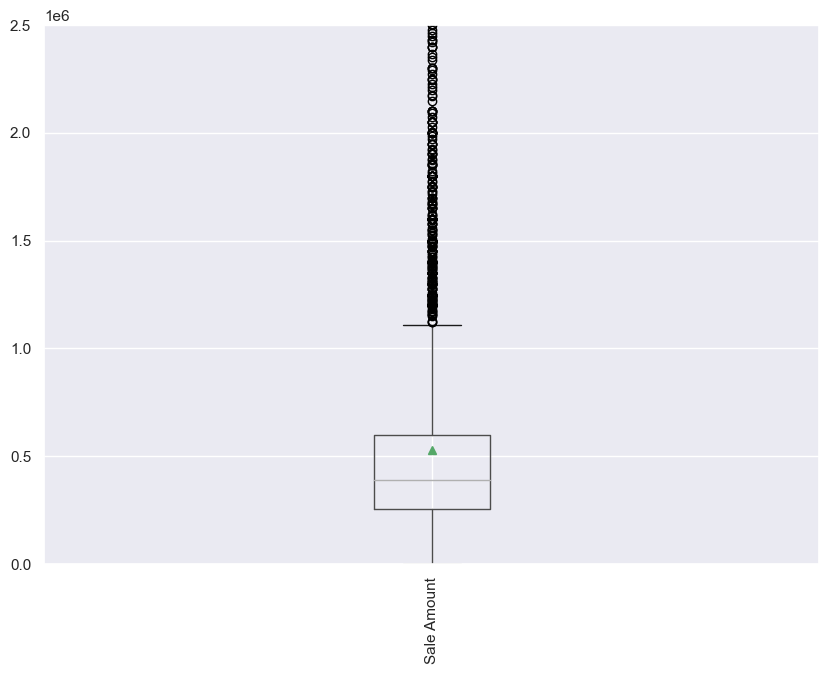

In [111]:
dfNewOut.boxplot(column='Sale Amount', figsize=(10, 7), showmeans=True)
plt.xticks(rotation=90)
plt.ylim(0, 2500000)
plt.show()

###### Next attempt at sampling data

In [267]:
len(dfMLNADrop[dfMLNADrop['Sale Amount']>=0.01])

608792

In [268]:
len(dfMLNADrop[dfMLNADrop['Sales Ratio']>=0.01])

606358

In [269]:
len(dfMLNADrop[dfMLNADrop['Assessed Value']>=0.01])

606899

In [270]:
len(dfMLNADrop[dfMLNADrop['Sale Amount']!=0])

608792

In [273]:
dfMLNADrop['Sale Amount'].mean()

362568.4760475543

In [276]:
dfMLNADrop['Sale Amount'].quantile(0.1) #10th Percentile

85000.0

In [280]:
dfMLNADrop['Sale Amount'].quantile(0.9) #90th Percentile

629000.0

##### Choosing sample between 10th and 90th percentile to avoid outliers affecting the machine learning algorithm

In [178]:
dfMLSample = dfMLNADrop.loc[dfMLNADrop['Sale Amount'] >= 85000]
dfMLSample = dfMLSample.loc[dfMLNADrop['Sale Amount'] <= 629000]

In [179]:
print(dfMLSample['Sale Amount'].min())
print(dfMLSample['Sale Amount'].max())

85000.0
629000.0


In [180]:
dfMLSample

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type
1,20002,2020,10/02/2020,Ashford,253000.0,430000.0,0.5883,Residential
2,200212,2020,03/09/2021,Avon,130400.0,179900.0,0.7248,Residential
6,2020180,2020,03/01/2021,Berlin,234200.0,130000.0,1.8015,Residential
9,20139,2020,12/16/2020,Bethel,171360.0,335000.0,0.5115,Residential
10,200086,2020,08/10/2021,Bethlehem,168900.0,352000.0,0.4798,Residential
...,...,...,...,...,...,...,...,...
997203,190302,2019,11/29/2019,Waterbury,77870.0,112000.0,0.6953,Three Family
997205,190161,2019,03/02/2020,Newington,306000.0,456000.0,0.6711,Single Family
997206,19921,2019,11/18/2019,West Haven,125230.0,246000.0,0.5091,Single Family
997210,190129,2019,04/27/2020,Windsor Locks,121450.0,210000.0,0.5783,Single Family


In [181]:
dfMLSample.dtypes

Serial Number       int64
List Year           int64
Date Recorded      object
Town               object
Assessed Value    float64
Sale Amount       float64
Sales Ratio       float64
Property Type      object
dtype: object

In [182]:
dfMLSample["Date Recorded"] = pd.to_datetime(dfMLSample["Date Recorded"]) # Change to datetype

In [183]:
dfMLSample['Month'] = pd.DatetimeIndex(dfMLSample['Date Recorded']).month

In [305]:
dfMLSample

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type
1,20002,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential
2,200212,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential
6,2020180,2020,2021-03-01,Berlin,234200.0,130000.0,1.8015,Residential
9,20139,2020,2020-12-16,Bethel,171360.0,335000.0,0.5115,Residential
10,200086,2020,2021-08-10,Bethlehem,168900.0,352000.0,0.4798,Residential
...,...,...,...,...,...,...,...,...
997203,190302,2019,2019-11-29,Waterbury,77870.0,112000.0,0.6953,Three Family
997205,190161,2019,2020-03-02,Newington,306000.0,456000.0,0.6711,Single Family
997206,19921,2019,2019-11-18,West Haven,125230.0,246000.0,0.5091,Single Family
997210,190129,2019,2020-04-27,Windsor Locks,121450.0,210000.0,0.5783,Single Family


In [307]:
dfMLSample

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Month
1,20002,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,10
2,200212,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,3
6,2020180,2020,2021-03-01,Berlin,234200.0,130000.0,1.8015,Residential,3
9,20139,2020,2020-12-16,Bethel,171360.0,335000.0,0.5115,Residential,12
10,200086,2020,2021-08-10,Bethlehem,168900.0,352000.0,0.4798,Residential,8
...,...,...,...,...,...,...,...,...,...
997203,190302,2019,2019-11-29,Waterbury,77870.0,112000.0,0.6953,Three Family,11
997205,190161,2019,2020-03-02,Newington,306000.0,456000.0,0.6711,Single Family,3
997206,19921,2019,2019-11-18,West Haven,125230.0,246000.0,0.5091,Single Family,11
997210,190129,2019,2020-04-27,Windsor Locks,121450.0,210000.0,0.5783,Single Family,4


In [308]:
dfMLSample.to_csv('RealEstateFinalClean.csv',index=False)

In [309]:
dfMLSampleDRD = dfMLSample.drop(['Date Recorded'], axis=1)

In [310]:
dfMLSampleDRD

,Serial Number,List Year,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Month
1,20002,2020,Ashford,253000.0,430000.0,0.5883,Residential,10
2,200212,2020,Avon,130400.0,179900.0,0.7248,Residential,3
6,2020180,2020,Berlin,234200.0,130000.0,1.8015,Residential,3
9,20139,2020,Bethel,171360.0,335000.0,0.5115,Residential,12
10,200086,2020,Bethlehem,168900.0,352000.0,0.4798,Residential,8
...,...,...,...,...,...,...,...,...
997203,190302,2019,Waterbury,77870.0,112000.0,0.6953,Three Family,11
997205,190161,2019,Newington,306000.0,456000.0,0.6711,Single Family,3
997206,19921,2019,West Haven,125230.0,246000.0,0.5091,Single Family,11
997210,190129,2019,Windsor Locks,121450.0,210000.0,0.5783,Single Family,4


<AxesSubplot:>

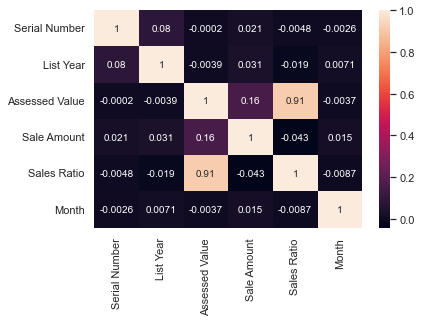

In [311]:
correlations = dfMLSampleDRD.corr()
sns.heatmap(correlations, annot=True)

##### There is no correlation between either variables so it wouldn't be possible to utilize regression modeling as the model will be underfitting

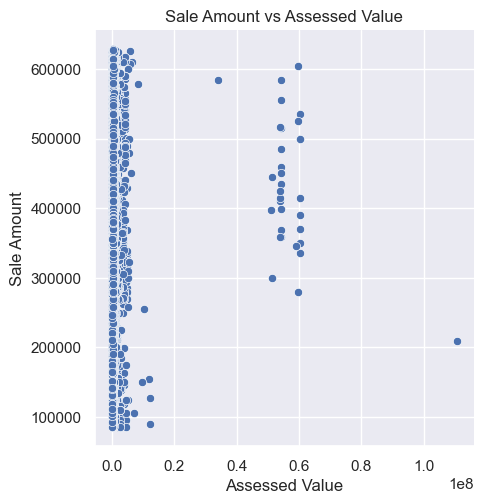

In [143]:
h = sns.relplot(x='Assessed Value', y='Sale Amount', data=dfMLSample, kind='scatter').set(title='Sale Amount vs Assessed Value')

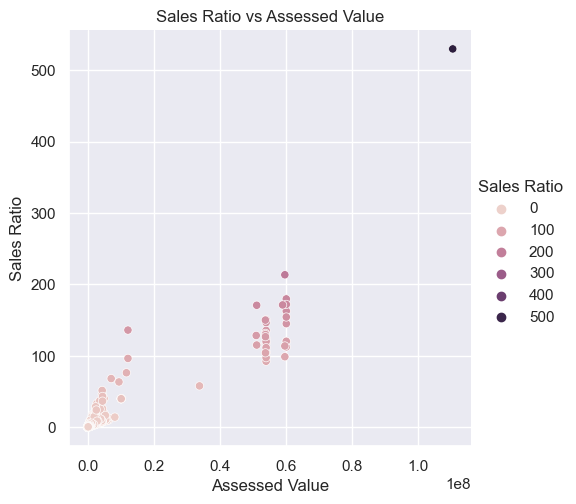

In [146]:
h = sns.relplot(x='Assessed Value', y='Sales Ratio', hue = 'Sales Ratio',data=dfMLSample, kind='scatter').set(title='Sales Ratio vs Assessed Value')

In [184]:
dfMLSample

,Serial Number,List Year,Date Recorded,Town,Assessed Value,Sale Amount,Sales Ratio,Property Type,Month
1,20002,2020,2020-10-02,Ashford,253000.0,430000.0,0.5883,Residential,10
2,200212,2020,2021-03-09,Avon,130400.0,179900.0,0.7248,Residential,3
6,2020180,2020,2021-03-01,Berlin,234200.0,130000.0,1.8015,Residential,3
9,20139,2020,2020-12-16,Bethel,171360.0,335000.0,0.5115,Residential,12
10,200086,2020,2021-08-10,Bethlehem,168900.0,352000.0,0.4798,Residential,8
...,...,...,...,...,...,...,...,...,...
997203,190302,2019,2019-11-29,Waterbury,77870.0,112000.0,0.6953,Three Family,11
997205,190161,2019,2020-03-02,Newington,306000.0,456000.0,0.6711,Single Family,3
997206,19921,2019,2019-11-18,West Haven,125230.0,246000.0,0.5091,Single Family,11
997210,190129,2019,2020-04-27,Windsor Locks,121450.0,210000.0,0.5783,Single Family,4


In [189]:
dfMLSampled = dfMLSample.drop(['Serial Number', 'Town', 'Property Type','Date Recorded'], axis=1)

In [190]:
dfMLSampled.dtypes

List Year           int64
Assessed Value    float64
Sale Amount       float64
Sales Ratio       float64
Month               int64
dtype: object

In [191]:
#dividing the data to test and train sets

x_train1 = dfMLSampled.loc[:, dfMLSampled.columns != 'Sale Amount']
y_train1 = dfMLSampled['Sale Amount']
# Divide training sets and test sets
train_X1, test_X1, train_y1, test_y1 = train_test_split(x_train1, y_train1, train_size=.8, random_state=3)

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

In [192]:
lm1 = LinearRegression()
lm1.fit(train_X1, train_y1)
lm1.score(test_X1, test_y1)

-0.5211838574180208

In [193]:
# Predict using test data
yPred1 = lm1.predict(test_X1)

In [194]:
from sklearn.metrics import r2_score
acqSc1 =r2_score(test_y1, yPred1)
acqSc1

-0.5211838574180208

In [ ]:
lm.fit

In [ ]:
y_predict = lm.predict(test_X)
mse = mean_squared_error(y_predict, test_y)
rmse = np.sqrt(mse)
print(mse)
print(rmse)